In [860]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import folium
import sqlite3

In [861]:
air_reserve = pd.read_csv('../data/raw/air_reserve.csv')
air_store_info = pd.read_csv('../data/raw/air_store_info.csv')
air_visit_data = pd.read_csv('../data/raw/air_visit_data.csv')
date_info = pd.read_csv('../data/raw/date_info.csv')
hpg_reserve = pd.read_csv('../data/raw/hpg_reserve.csv')
hpg_store_info = pd.read_csv('../data/raw/hpg_store_info.csv')
sample_submission = pd.read_csv('../data/raw/sample_submission.csv')
hpg_air_store_id_relation = pd.read_csv('../data/raw/store_id_relation.csv')

datasets = {
    'air_reserve': air_reserve,
    'air_store_info': air_store_info,
    'air_visit_data': air_visit_data,
    'date_info': date_info,
    'hpg_reserve': hpg_reserve,
    'hpg_store_info': hpg_store_info,
    'sample_submission': sample_submission,
    'hpg_air_store_id_relation': hpg_air_store_id_relation
}


for name, df in datasets.items():
    for col in df.columns:
        if df[col].dtype == "object" and ("date" in col.lower() or "time" in col.lower()):
            df[col] = pd.to_datetime(df[col], errors="coerce")



# Data Info and Summary

In [862]:
# Display descriptive statistics for each dataset
for name, df in datasets.items():
    print(f'{name} Data Description:'.upper())
    print(df.info())
    print('\n')

AIR_RESERVE DATA DESCRIPTION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   air_store_id      92378 non-null  object        
 1   visit_datetime    92378 non-null  datetime64[ns]
 2   reserve_datetime  92378 non-null  datetime64[ns]
 3   reserve_visitors  92378 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB
None


AIR_STORE_INFO DATA DESCRIPTION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   air_store_id    829 non-null    object 
 1   air_genre_name  829 non-null    object 
 2   air_area_name   829 non-null    object 
 3   latitude        829 non-null    float64
 4   longitude       829 non-null    float64
dtypes: fl

In [863]:
# Display descriptive statistics for each dataset
for name, df in datasets.items():
    print(f'{name} Data Description:'.upper())
    print(df.describe(include='all'))
    print('\n')

AIR_RESERVE DATA DESCRIPTION:
                air_store_id                 visit_datetime  \
count                  92378                          92378   
unique                   314                            NaN   
top     air_8093d0b565e9dbdf                            NaN   
freq                    2263                            NaN   
mean                     NaN  2016-12-05 08:18:58.751651072   
min                      NaN            2016-01-01 19:00:00   
25%                      NaN            2016-11-15 19:00:00   
50%                      NaN            2017-01-05 18:00:00   
75%                      NaN            2017-03-03 19:00:00   
max                      NaN            2017-05-31 21:00:00   
std                      NaN                            NaN   

                     reserve_datetime  reserve_visitors  
count                           92378      92378.000000  
unique                            NaN               NaN  
top                               NaN  

# Visualizing Features

## Air Visits

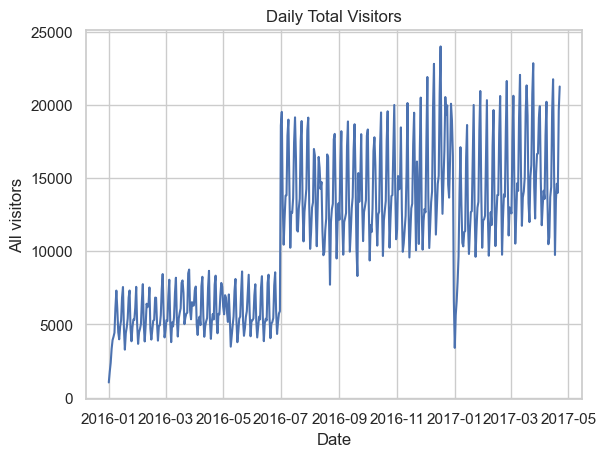

In [864]:
import os
os.makedirs('../reports/figures/air_visits', exist_ok=True)

# Plot 1: daily total visitors
air_visit_data["visitors"] = pd.to_numeric(air_visit_data["visitors"], errors="coerce")
daily = air_visit_data.groupby("visit_date")["visitors"].sum().reset_index()
plt.plot(daily["visit_date"], daily["visitors"])
plt.xlabel("Date")
plt.ylabel("All visitors")
plt.title("Daily Total Visitors")
plt.savefig('../reports/figures/air_visits/daily_total_visitors.png')
plt.show()

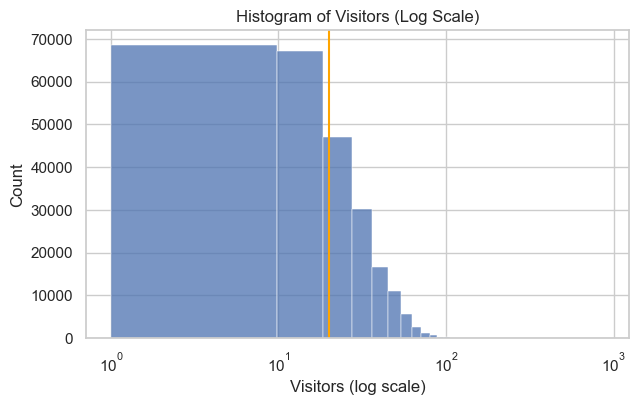

In [865]:
# Plot 2: histogram of visitors (log x-axis)
plt.figure(figsize=(7, 4))
sns.histplot(air_visit_data["visitors"], bins=100)
plt.axvline(20, color="orange")
plt.xscale("log")
plt.xlabel("Visitors (log scale)")
plt.ylabel("Count")
plt.title("Histogram of Visitors (Log Scale)")
plt.savefig('../reports/figures/air_visits/histogram_visitors_log.png')
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/1009127145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wday.index, y=wday.values, palette="husl")


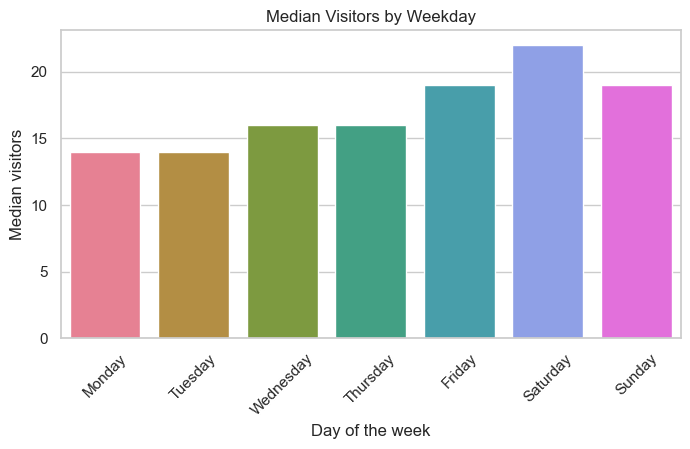

In [866]:
# Plot 3: median visitors by weekday
air_visit_data["wday"] = air_visit_data["visit_date"].dt.day_name()
wday = air_visit_data.groupby("wday")["visitors"].median().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.figure(figsize=(8, 4))
sns.barplot(x=wday.index, y=wday.values, palette="husl")
plt.xlabel("Day of the week")
plt.ylabel("Median visitors")
plt.title("Median Visitors by Weekday")
plt.xticks(rotation=45)
plt.savefig('../reports/figures/air_visits/median_visitors_by_weekday.png')
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/3451502555.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months_order = pd.date_range("2020-01-01", periods=12, freq="M").month_name().unique()
/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/3451502555.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month.index, y=month.values, palette="husl")


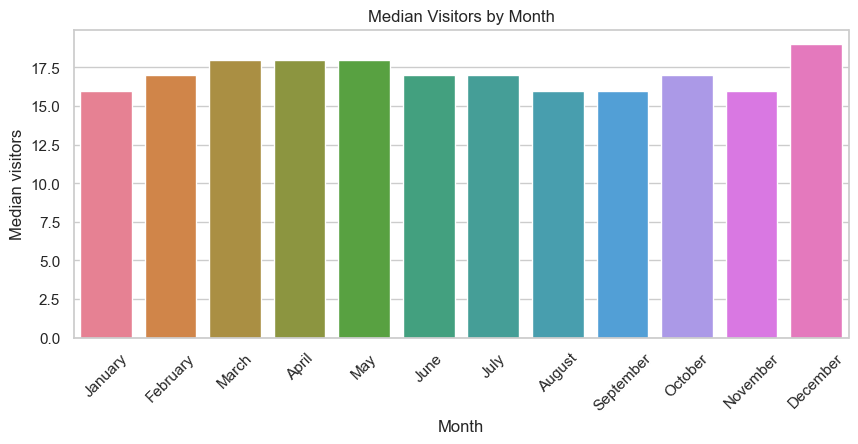

In [867]:
# Plot 4: median visitors by month
air_visit_data["month"] = air_visit_data["visit_date"].dt.month_name()
month = air_visit_data.groupby("month")["visitors"].median()
months_order = pd.date_range("2020-01-01", periods=12, freq="M").month_name().unique()
month = month.reindex(months_order)
plt.figure(figsize=(10, 4))
sns.barplot(x=month.index, y=month.values, palette="husl")
plt.xlabel("Month")
plt.ylabel("Median visitors")
plt.title("Median Visitors by Month")
plt.xticks(rotation=45)
plt.savefig('../reports/figures/air_visits/median_visitors_by_month.png')
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/3510052671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette="husl")


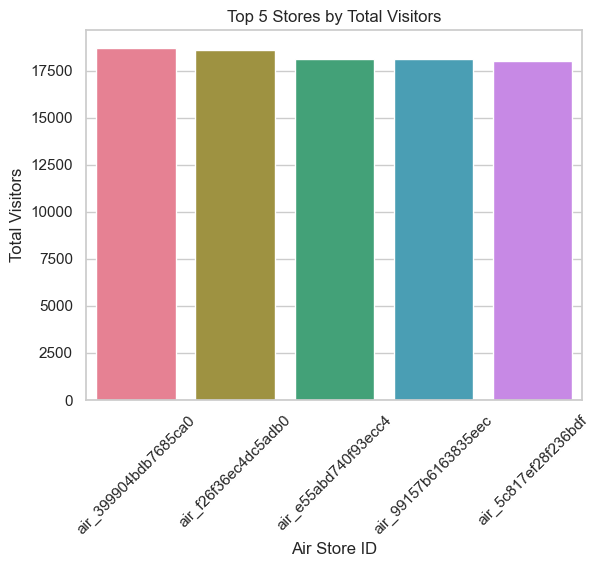

In [868]:
# Plot 5: total visitors by top 5 air stores
top5 = air_visit_data.groupby("air_store_id")["visitors"].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top5.index, y=top5.values, palette="husl")
plt.xlabel("Air Store ID")
plt.ylabel("Total Visitors")
plt.xticks(rotation=45)
plt.title("Top 5 Stores by Total Visitors")
plt.savefig('../reports/figures/air_visits/top5_total_visitors_by_air_store.png')
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/3989264815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom5.index, y=bottom5.values, palette="husl")


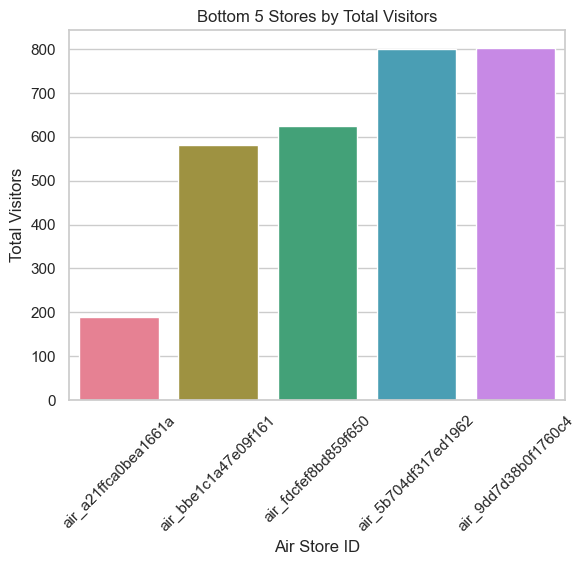

In [869]:
# Plot 6: total visitors by bottom 5 air stores
bottom5 = air_visit_data.groupby("air_store_id")["visitors"].sum().sort_values(ascending=True).head(5)
sns.barplot(x=bottom5.index, y=bottom5.values, palette="husl")
plt.xlabel("Air Store ID")
plt.ylabel("Total Visitors")
plt.xticks(rotation=45)
plt.title("Bottom 5 Stores by Total Visitors")
plt.savefig('../reports/figures/air_visits/bottom5_total_visitors_by_air_store.png')
plt.show()

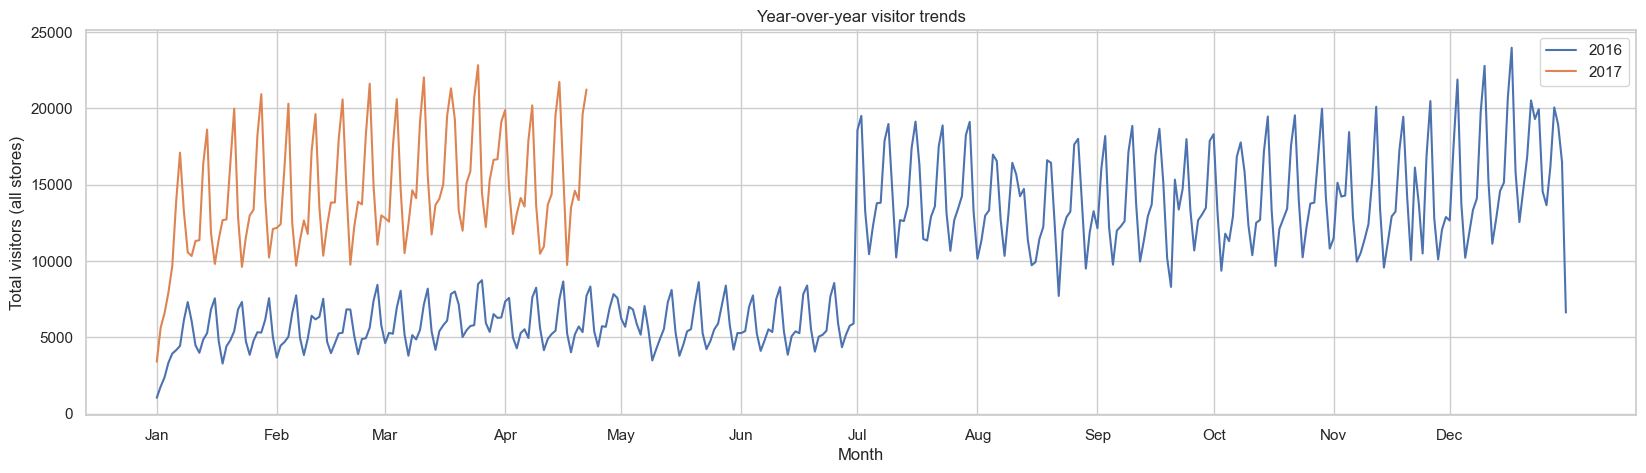

In [870]:
# Plot 7: Year-over-year visitor trends
# --- Prepare daily visitors ---
visits = air_visit_data.copy()
visits["visit_date"] = pd.to_datetime(visits["visit_date"])

# Drop Feb 29 (leap day)
visits = visits[~((visits["visit_date"].dt.month == 2) & 
                  (visits["visit_date"].dt.day == 29))]

# Total visitors per day
daily = visits.groupby("visit_date", as_index=False)["visitors"].sum()

# Create aligned day-of-year (removes Feb 29 offset)
doy = daily["visit_date"].dt.dayofyear
is_leap = daily["visit_date"].dt.is_leap_year
daily["doy_aligned"] = np.where(is_leap & (doy > 59), doy - 1, doy)
daily["year"] = daily["visit_date"].dt.year

plt.figure(figsize=(20, 5))
# Plot daily visitors per year
for year, group in daily.groupby("year"):
    group = group.sort_values("doy_aligned")
    plt.plot(group["doy_aligned"], group["visitors"], label=str(year))

# Month tick positions (using a non-leap reference year)
months = pd.date_range("2001-01-01", "2001-12-01", freq="MS")
plt.xticks(months.dayofyear, months.strftime("%b"))

# Labels and title
plt.xlabel("Month")
plt.ylabel("Total visitors (all stores)")
plt.title("Year-over-year visitor trends")
plt.legend()
plt.savefig('../reports/figures/air_visits/year_over_year_visitor_trends.png')
plt.show()

## Air Reservations

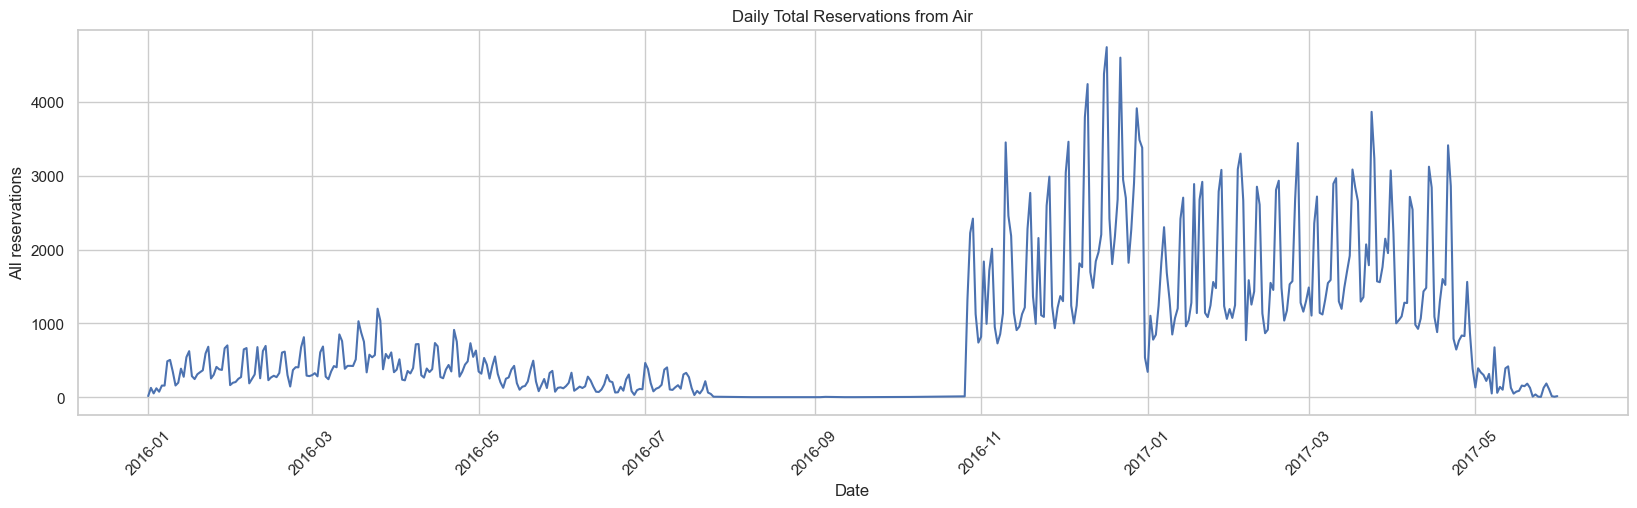

In [871]:
# Plot 9: Daily Visits made from Air using Reservations
plt.figure(figsize=(20, 5))
air_reserve["visit_date"] = air_reserve["visit_datetime"].dt.date
daily = air_reserve.groupby("visit_date")["reserve_visitors"].sum()
sns.lineplot(x=daily.index, y=daily.values,)
plt.xlabel("Date")
plt.ylabel("All reservations")
plt.title("Daily Total Reservations from Air")
plt.xticks(rotation=45)
plt.savefig('../reports/figures/air_reserve/daily_total_reservations.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/206662236.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly["reserve_hour"], y=hourly["reserve_visitors"], palette="tab10")


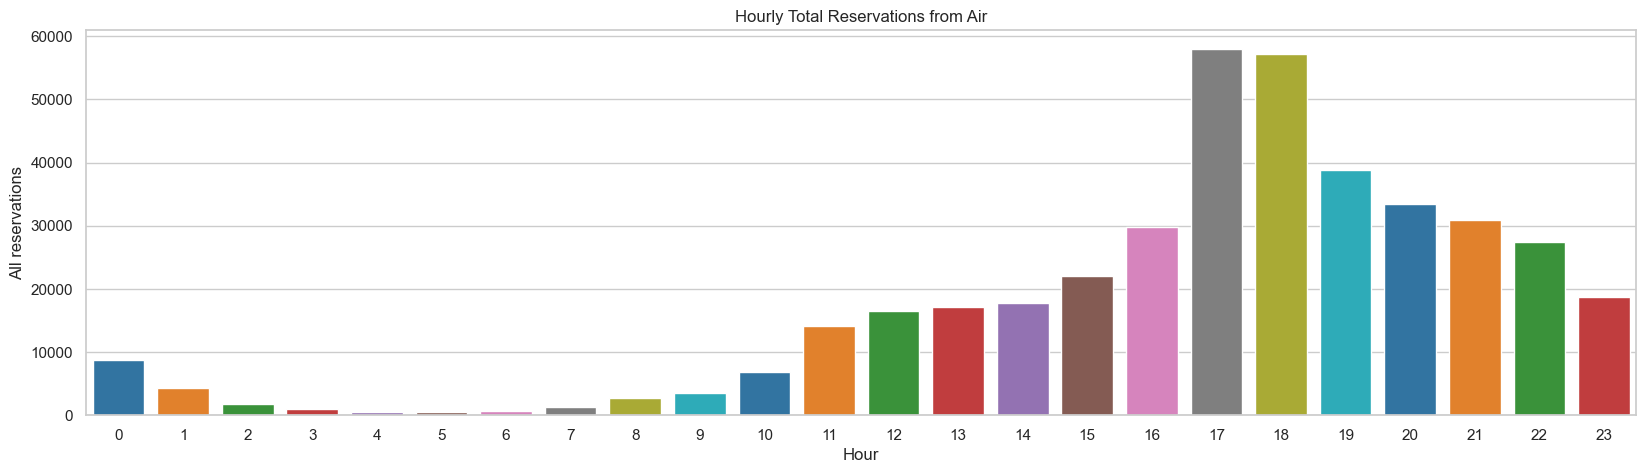

In [872]:
# Plot 9: Hourly Reservations made from Air
plt.figure(figsize=(20, 5))
air_reserve["reserve_hour"] = air_reserve["reserve_datetime"].dt.hour
hourly = air_reserve.groupby("reserve_hour")["reserve_visitors"].sum().reset_index()
sns.barplot(x=hourly["reserve_hour"], y=hourly["reserve_visitors"], palette="tab10")
plt.xlabel("Hour")
plt.ylabel("All reservations")
plt.title("Hourly Total Reservations from Air")
plt.savefig('../reports/figures/air_reserve/hourly_total_reservations.png')
plt.show()


/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/194210128.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly.index, y=monthly.values, palette="tab10")


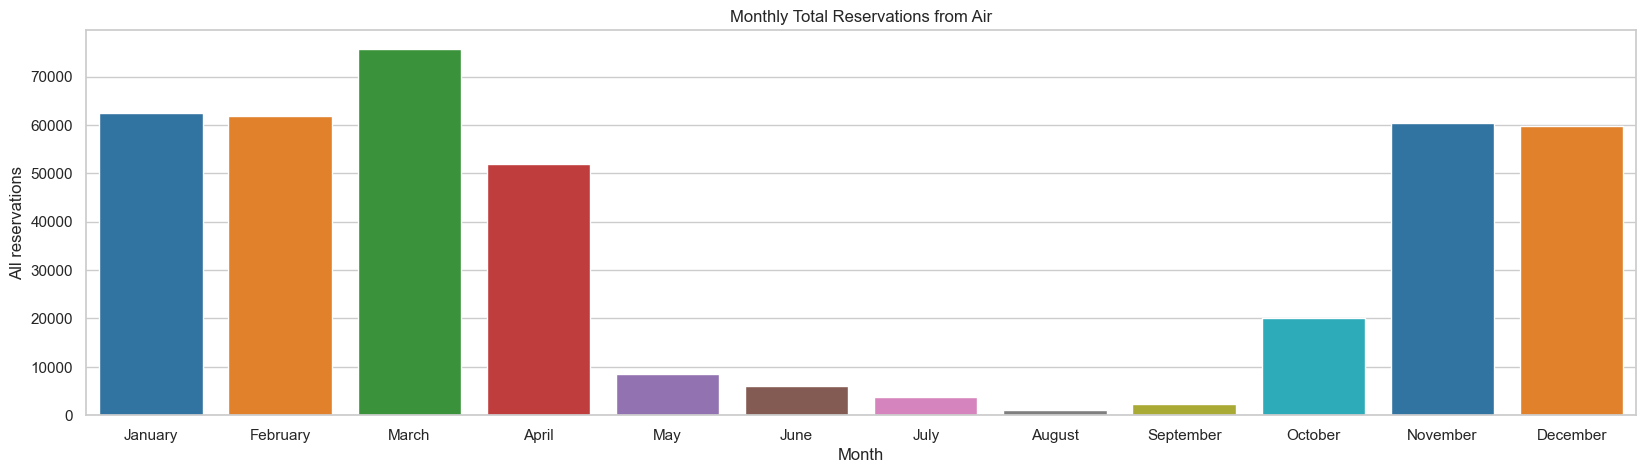

In [873]:
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

# Plot 10: Monthly Reservsations made from Air
plt.figure(figsize=(20, 5))
air_reserve["reserve_month"] = air_reserve["reserve_datetime"].dt.month
monthly = air_reserve.groupby("reserve_month")["reserve_visitors"].sum()
monthly.index = monthly.index.map(month_names)
sns.barplot(x=monthly.index, y=monthly.values, palette="tab10")
plt.xlabel("Month")
plt.ylabel("All reservations")
plt.title("Monthly Total Reservations from Air")
plt.savefig('../reports/figures/air_reserve/monthly_total_reservations.png')
plt.show()

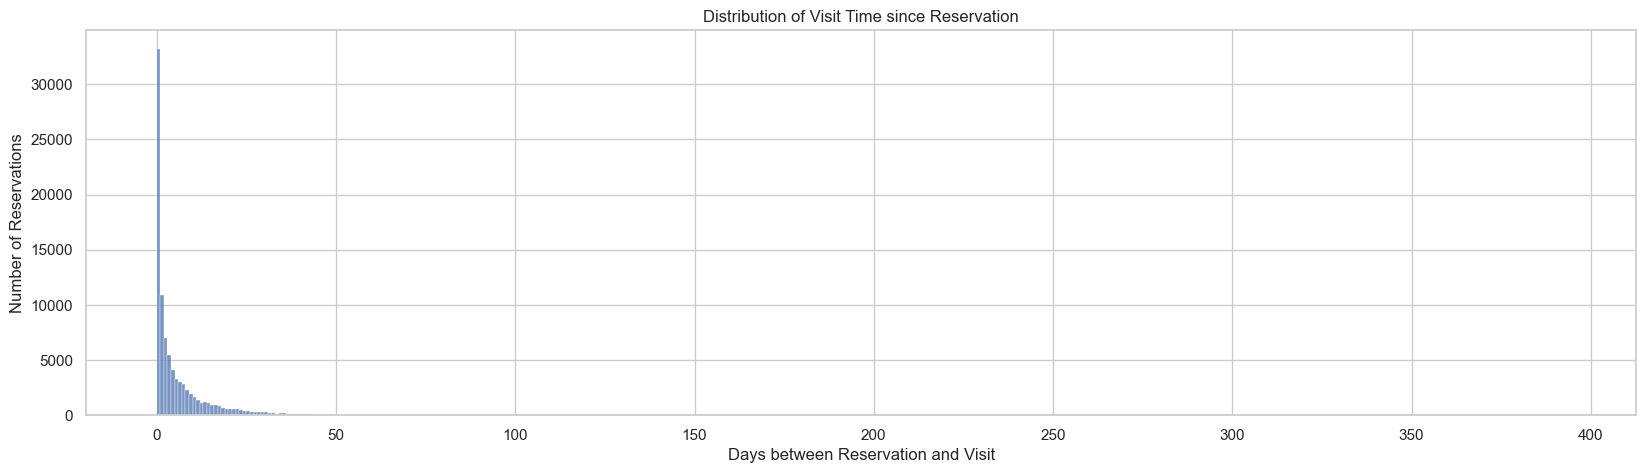

In [874]:
# Plot 11: Visit Time since Reservation from Air
plt.figure(figsize=(20, 5))
air_reserve["visit_time"] = (air_reserve["visit_datetime"] - air_reserve["reserve_datetime"]).dt.days
sns.histplot(air_reserve["visit_time"], binwidth=1)
plt.xlabel("Days between Reservation and Visit")
plt.ylabel("Number of Reservations")
plt.title("Distribution of Visit Time since Reservation")
plt.savefig('../reports/figures/air_reserve/visit_time_distribution.png')
plt.show()

## HPG Reservations

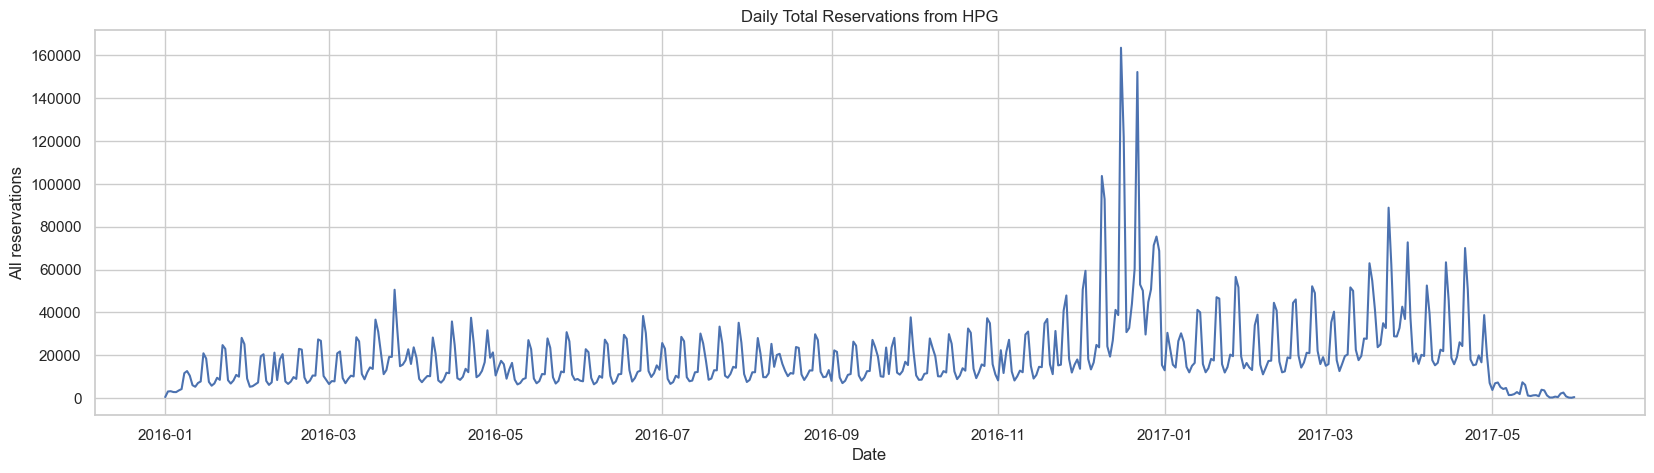

In [876]:
# Plot 13: Daily Visits made from HPG using Reservations
plt.figure(figsize=(20, 5))
hpg_reserve["visit_date"] = hpg_reserve["visit_datetime"].dt.date
daily = hpg_reserve.groupby("visit_date")["reserve_visitors"].sum()
sns.lineplot(x=daily.index, y=daily.values)
plt.xlabel("Date")
plt.ylabel("All reservations")
plt.title("Daily Total Reservations from HPG")
plt.savefig('../reports/figures/hpg_reserve/daily_total_reservations.png')
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/2939767595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly.index, y=hourly.values, palette="tab10")


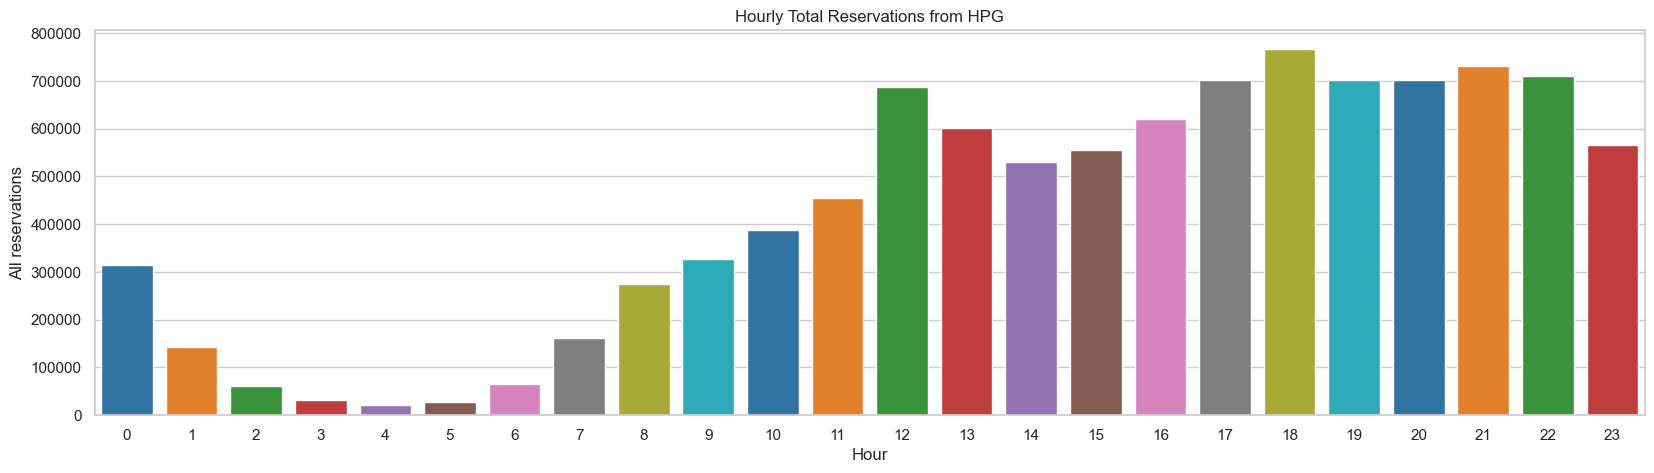

In [877]:
# Plot 14: Hourly Reservations made from HGP
plt.figure(figsize=(20, 5))
hpg_reserve["reserve_hour"] = hpg_reserve["reserve_datetime"].dt.hour
hourly = hpg_reserve.groupby("reserve_hour")["reserve_visitors"].sum()
sns.barplot(x=hourly.index, y=hourly.values, palette="tab10")
plt.xlabel("Hour")
plt.ylabel("All reservations")
plt.title("Hourly Total Reservations from HPG")
plt.savefig('../reports/figures/hpg_reserve/hourly_total_reservations.png')
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/2950315492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly.index, y=monthly.values, palette="tab10")


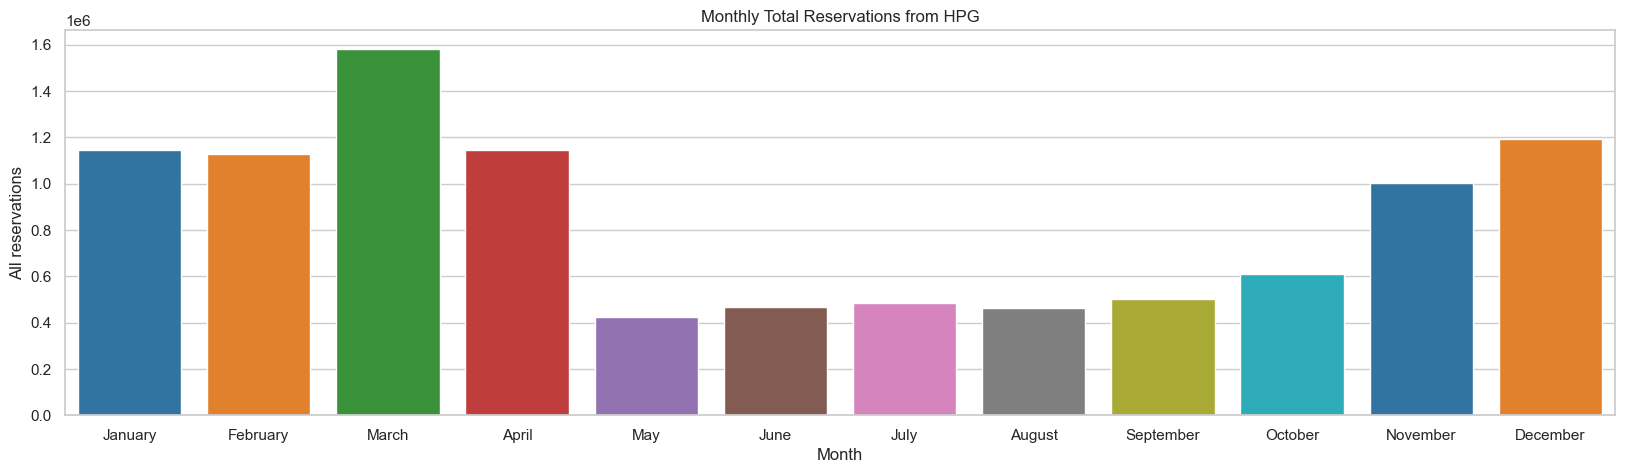

In [878]:
# Plot 15: Monthly Reservations made from HGP
plt.figure(figsize=(20, 5))
hpg_reserve["reserve_month"] = hpg_reserve["reserve_datetime"].dt.month
monthly = hpg_reserve.groupby("reserve_month")["reserve_visitors"].sum()
monthly.index = monthly.index.map(month_names)
sns.barplot(x=monthly.index, y=monthly.values, palette="tab10")
plt.xlabel("Month")
plt.ylabel("All reservations")
plt.title("Monthly Total Reservations from HPG")
plt.savefig('../reports/figures/hpg_reserve/monthly_total_reservations.png')
plt.show()

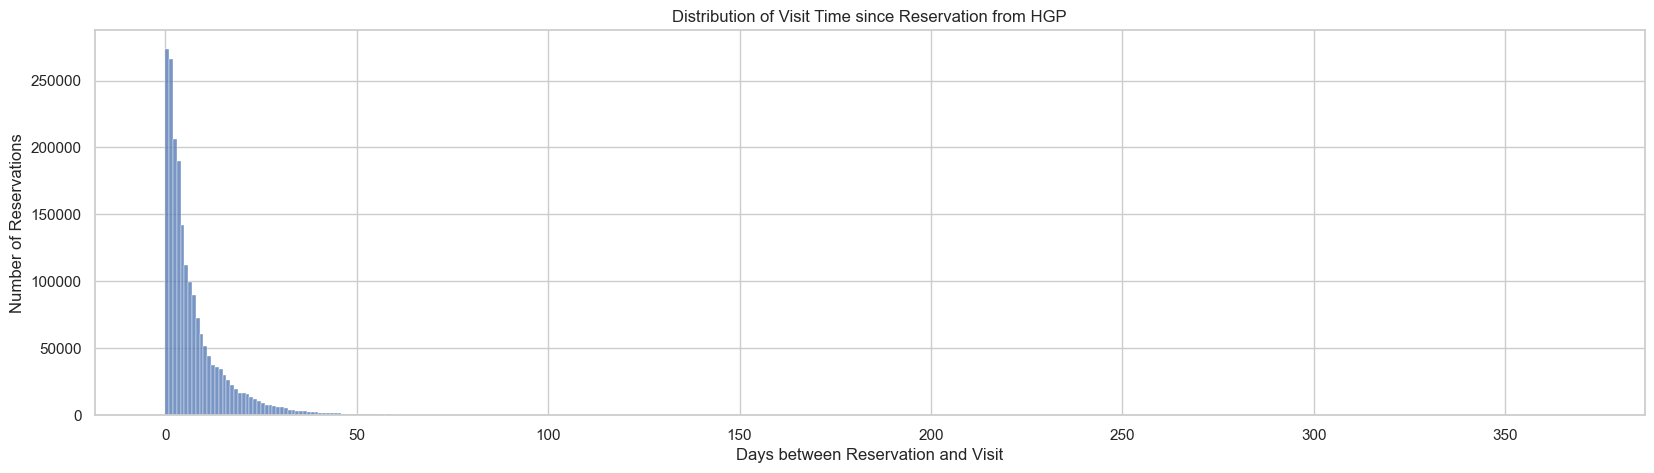

In [879]:
# Plot 16: Visit Time since Reservation from HGP
plt.figure(figsize=(20, 5))
hpg_reserve["visit_time"] = (hpg_reserve["visit_datetime"] - hpg_reserve["reserve_datetime"]).dt.days
sns.histplot(hpg_reserve["visit_time"], binwidth=1)
plt.xlabel("Days between Reservation and Visit")
plt.ylabel("Number of Reservations")
plt.title("Distribution of Visit Time since Reservation from HGP")
plt.savefig('../reports/figures/hpg_reserve/visit_time_distribution.png')
plt.show()

## Air Store

In [880]:
# Plot 17: All Air Stores in Map
center_lat = air_store_info["latitude"].mean()
center_lon = air_store_info["longitude"].mean()

m = folium.Map(location=[center_lat, center_lon],
               zoom_start=6,
               dragging=False,
               zoomControl=False,
               scrollWheelZoom=False,
               doubleClickZoom=False,
               touchZoom=False)

# Add one marker per store
for _, row in air_store_info.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]]).add_to(m)

m

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/269595715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=air_store_info["air_genre_name"], y=air_store_info["store_type_num"], palette="tab10")


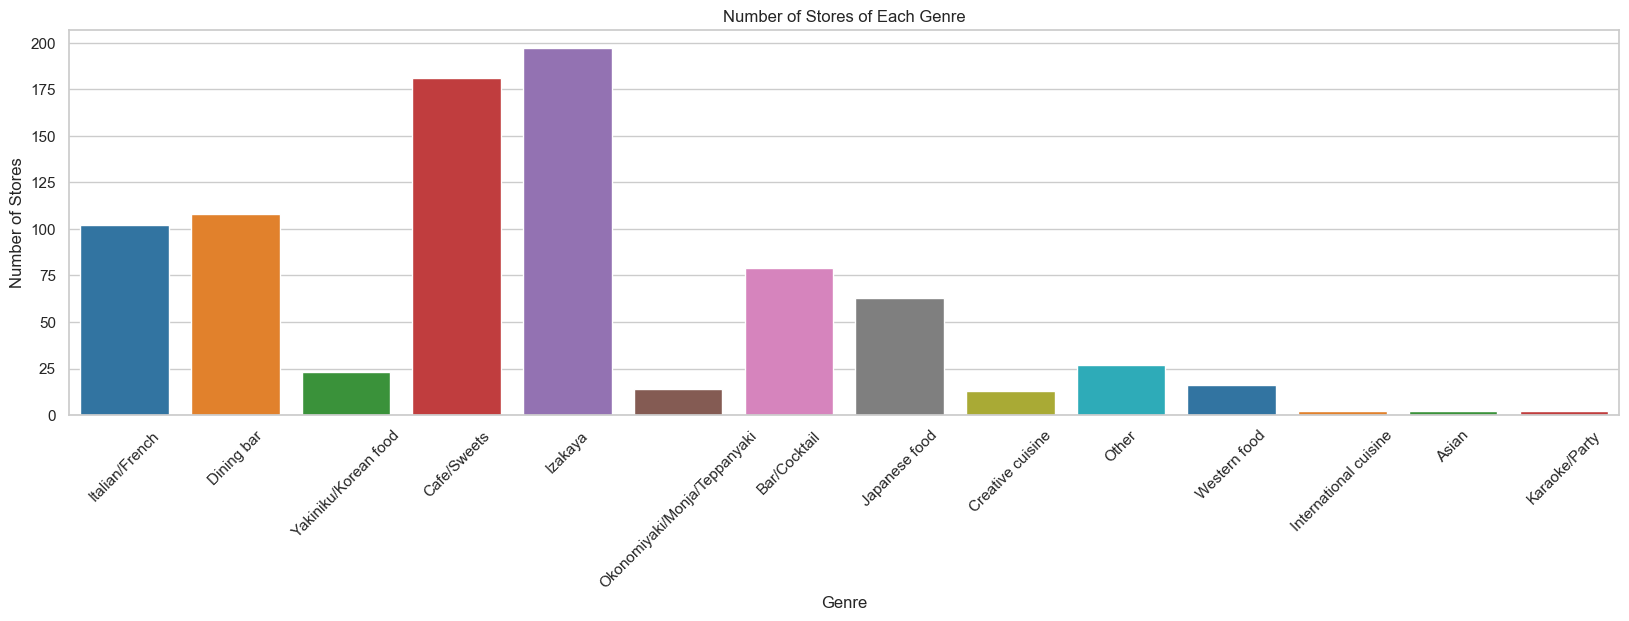

In [881]:
# Plot 18: Number of Stores of each type of Air Stores
plt.figure(figsize=(20, 5))
air_store_info["store_type_num"] = air_store_info.groupby("air_genre_name")["air_store_id"].transform("count")
sns.barplot(x=air_store_info["air_genre_name"], y=air_store_info["store_type_num"], palette="tab10")
plt.xlabel("Genre")
plt.ylabel("Number of Stores")
plt.title("Number of Stores of Each Genre")
plt.savefig('../reports/figures/air_store_info/store_of_genre.png')
plt.xticks(rotation=45)
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/129046645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


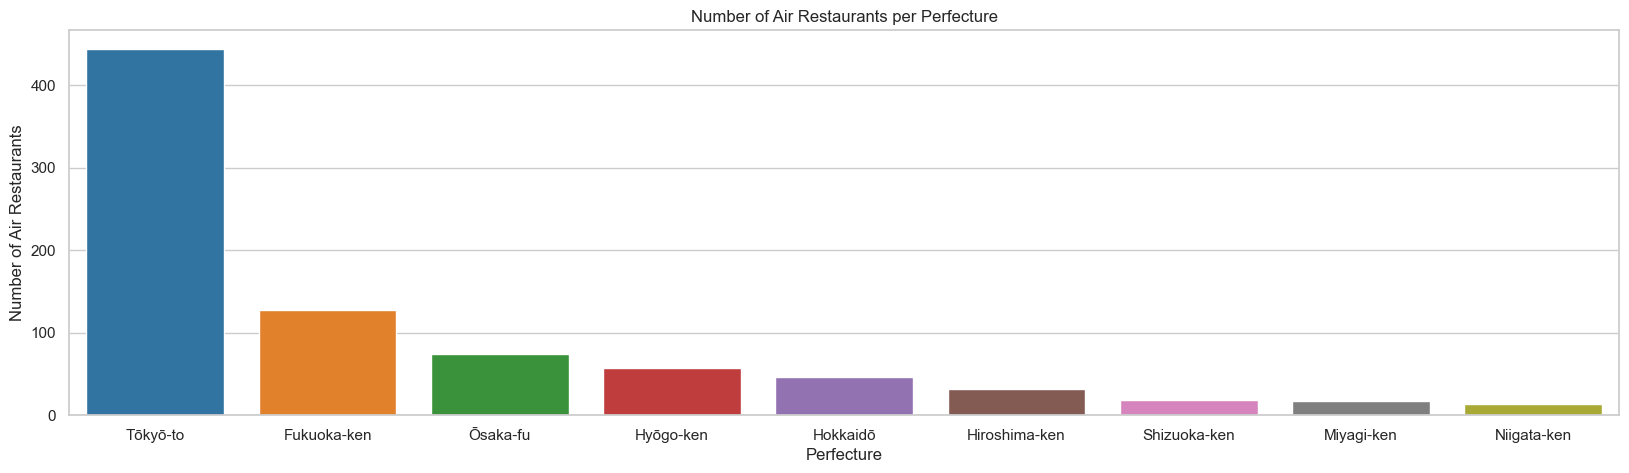

In [882]:
# Plot 19: Air Restaurants per perfecture
plt.figure(figsize=(20, 5))
air_store_info["perfecture"] = air_store_info["air_area_name"].map(lambda x: x.split(" ")[0])
sns.countplot(
    data=air_store_info,
    x="perfecture",
    order=air_store_info["perfecture"].value_counts().index,
    palette="tab10"
)
plt.xlabel("Perfecture")
plt.ylabel("Number of Air Restaurants")
plt.title("Number of Air Restaurants per Perfecture")
plt.savefig('../reports/figures/air_store_info/air_restaurants_per_perfecture.png')
plt.show()

## HPG Store

In [883]:
# Plot 20: All HPG Stores in Map
center_lat = hpg_store_info["latitude"].mean()
center_lon = hpg_store_info["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], 
               zoom_start=6,
               dragging=False,
               zoomControl=False,
               scrollWheelZoom=False,
               doubleClickZoom=False,
               touchZoom=False)

# Add one marker per store
for _, row in hpg_store_info.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]]).add_to(m)

m

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/821113321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hpg_store_info["hpg_genre_name"], y=hpg_store_info["store_type_num"], palette="tab10")


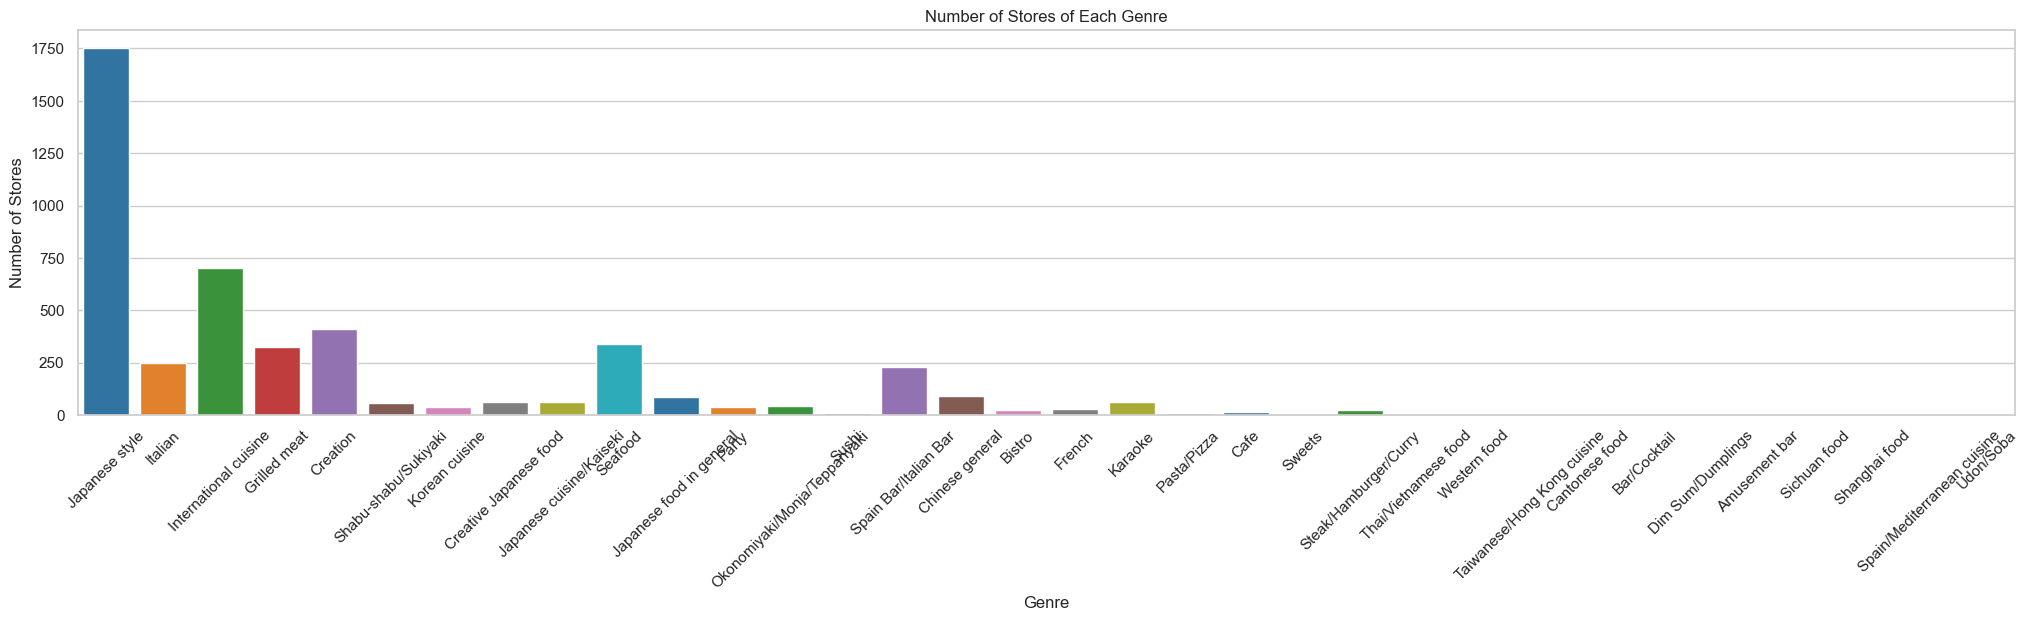

In [884]:
# Plot 21: Number of Stores of each type of HGP Stores
plt.figure(figsize=(25, 5))
hpg_store_info["store_type_num"] = hpg_store_info.groupby("hpg_genre_name")["hpg_store_id"].transform("count")
sns.barplot(x=hpg_store_info["hpg_genre_name"], y=hpg_store_info["store_type_num"], palette="tab10")
plt.xlabel("Genre")
plt.ylabel("Number of Stores")
plt.title("Number of Stores of Each Genre")
plt.savefig('../reports/figures/hpg_store_info/store_of_genre.png')
plt.xticks(rotation=45)
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/3107517450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


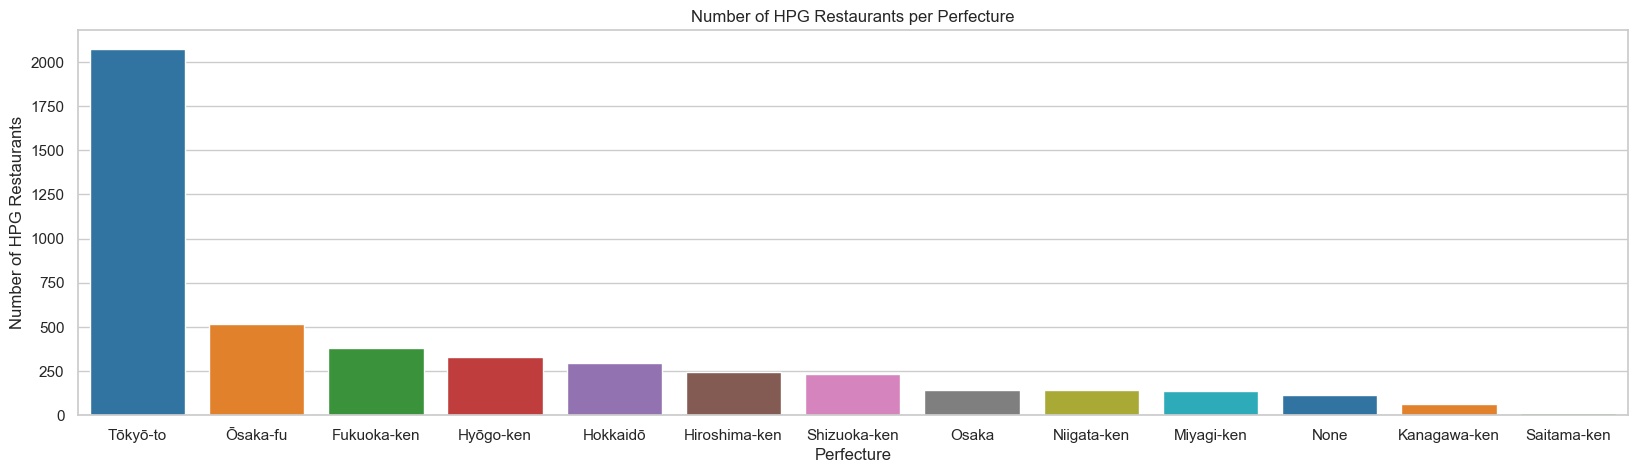

In [885]:
# Plot 22: HGP Restaurants per perfecture
plt.figure(figsize=(20, 5))
hpg_store_info["perfecture"] = hpg_store_info["hpg_area_name"].map(lambda x: x.split(" ")[0])
sns.countplot(
    data=hpg_store_info,
    x="perfecture",
    order=hpg_store_info["perfecture"].value_counts().index,
    palette="tab10"
)
plt.xlabel("Perfecture")
plt.ylabel("Number of HPG Restaurants")
plt.title("Number of HPG Restaurants per Perfecture")
plt.savefig('../reports/figures/hpg_store_info/hpg_restaurants_per_perfecture.png')
plt.show()

# Store ID Relation

In [886]:
# Plot 23: Restaurants using both Air and HPG systems

# --- Put dataframes into an in-memory SQLite DB ---
con = sqlite3.connect(":memory:")
air_store_info.to_sql("air", con, index=False, if_exists="replace")
hpg_store_info.to_sql("hpg", con, index=False, if_exists="replace")
hpg_air_store_id_relation.to_sql("rel", con, index=False, if_exists="replace")

# --- SQL: union air stores + only the HPG stores that have a relation ---
sql = """
SELECT air_store_id AS store_id, latitude, longitude, 'air' AS source
FROM air
UNION ALL
SELECT h.hpg_store_id AS store_id, h.latitude, h.longitude, 'hpg' AS source
FROM hpg AS h
JOIN rel AS r ON h.hpg_store_id = r.hpg_store_id;
"""
both = pd.read_sql_query(sql, con)
con.close()

# --- Folium map (simple, readable) ---
center = [both["latitude"].mean(), both["longitude"].mean()]
m = folium.Map(location=center, 
               zoom_start=6,
               dragging=False,
               zoomControl=False,
               scrollWheelZoom=False,
               doubleClickZoom=False,
               touchZoom=False)

for _, r in both.iterrows():
    color = "blue" if r["source"] == "air" else "red"
    folium.Marker(location=[r["latitude"], r["longitude"]]).add_to(m)

m  # in notebooks, renders inline once trusted

## Holidays

In [887]:
holiday = date_info[date_info["holiday_flg"] == 1]

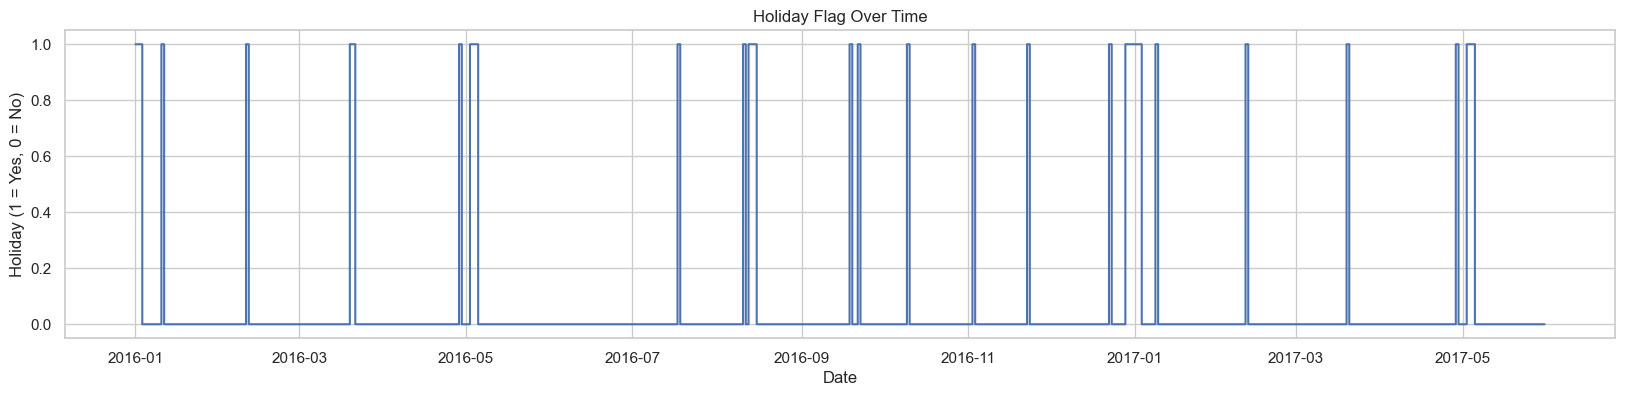

In [888]:
# Plot 24: Holiday Flag Over Time
plt.figure(figsize=(20,4))
sns.lineplot(data=date_info, x="calendar_date", y="holiday_flg", drawstyle="steps-mid")

plt.title("Holiday Flag Over Time")
plt.xlabel("Date")
plt.ylabel("Holiday (1 = Yes, 0 = No)")
plt.savefig('../reports/figures/date_info/holiday_flag_over_time.png')
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/3572830829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday["month"] = date_info["calendar_date"].dt.month_name()
/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/3572830829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=holiday, x="month", order=[


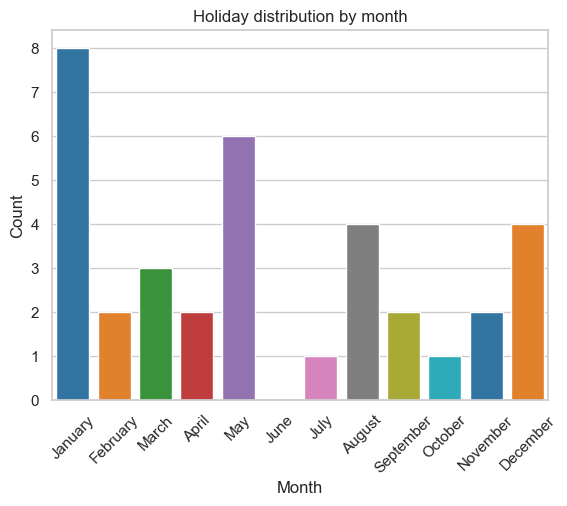

In [889]:
# Plot 25: Holiday distribution by Month
date_info["calendar_date"] = pd.to_datetime(date_info["calendar_date"])
holiday["month"] = date_info["calendar_date"].dt.month_name()

sns.countplot(data=holiday, x="month", order=[
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
], palette="tab10")

plt.title("Holiday distribution by month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig('../reports/figures/date_info/holiday_distribution_by_month.png')
plt.show()

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/3577940207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=holiday, x="day_of_week", palette="tab10")


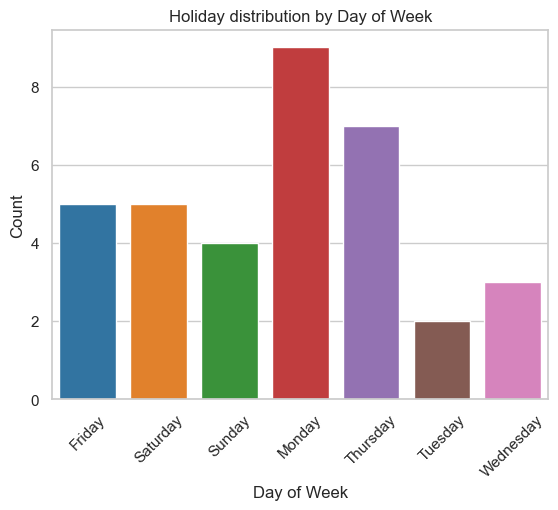

In [890]:
# Plot 26: Holiday distribution by Day of Week
sns.countplot(data=holiday, x="day_of_week", palette="tab10")
plt.title("Holiday distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig('../reports/figures/date_info/holiday_distribution_by_day_of_week.png')
plt.show()

# Feature Relations

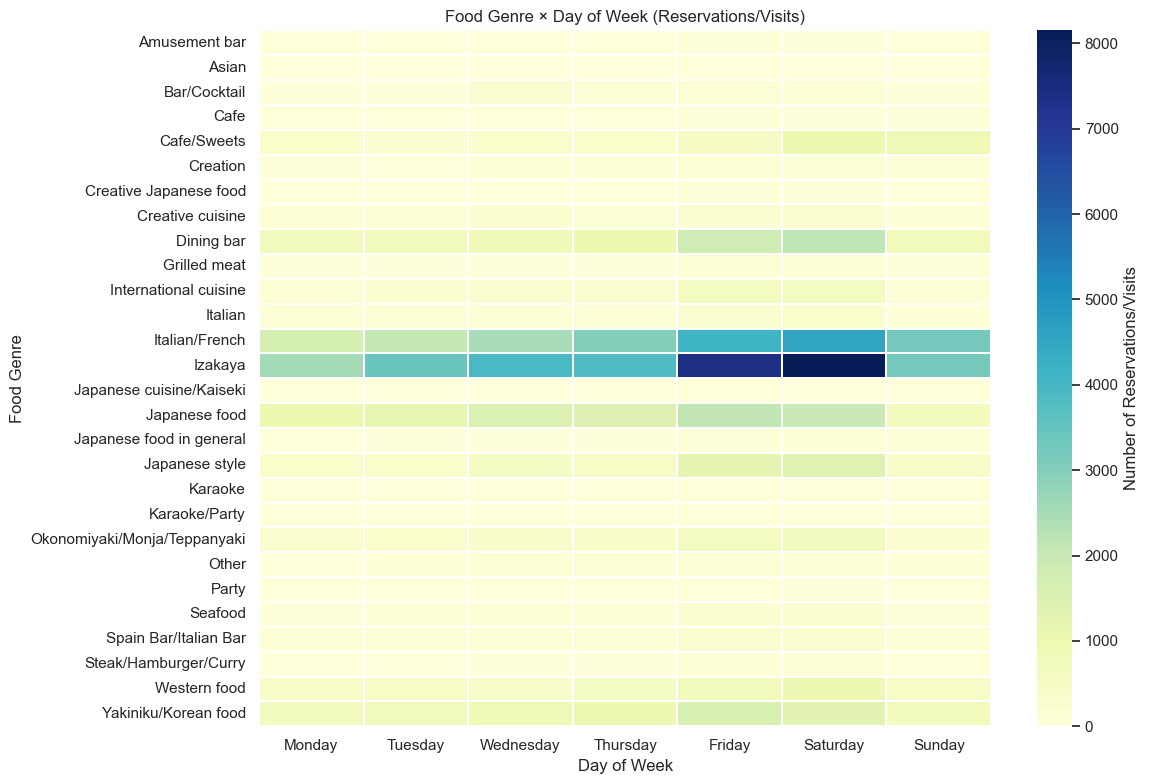

In [891]:
# Plot 27: Food Category vs. Visitor Count through Reservation for Air and HPG combined
air_reserve["visit_datetime"] = pd.to_datetime(air_reserve["visit_datetime"]).dt.date
hpg_reserve["visit_datetime"] = pd.to_datetime(hpg_reserve["visit_datetime"]).dt.date
date_info["calendar_date"] = pd.to_datetime(date_info["calendar_date"]).dt.date


# --- Load into SQLite ---
con = sqlite3.connect(":memory:")
air_store_info.to_sql("air", con, index=False, if_exists="replace")
air_reserve.to_sql("air_reserve", con, index=False, if_exists="replace")  # reservations
air_visit_data.to_sql("air_visit", con, index=False, if_exists="replace")   # visits
hpg_store_info.to_sql("hpg", con, index=False, if_exists="replace")
hpg_reserve.to_sql("hpg_reserve", con, index=False, if_exists="replace")    # reservations
hpg_air_store_id_relation.to_sql("rel", con, index=False, if_exists="replace")
date_info.to_sql("date_info", con, index=False, if_exists="replace")

# --- SQL: union Air visits + HPG reservations (mapped to genres via rel) ---
sql = """
-- Air reservations
SELECT
  asi.air_genre_name     AS genre,
  ar.visit_datetime      AS visit_date,
  di.day_of_week         AS day_of_week,
  'air'                  AS source
FROM air_reserve ar, air asi, date_info di
WHERE ar.air_store_id = asi.air_store_id
  AND ar.visit_datetime = di.calendar_date

UNION ALL

-- HPG reservations
SELECT
  h.hpg_genre_name       AS genre,
  hr.visit_datetime      AS visit_date,
  di.day_of_week         AS day_of_week,
  'hpg'                  AS source
FROM hpg_reserve hr, hpg h, rel r, date_info di
WHERE hr.hpg_store_id = h.hpg_store_id
  AND hr.hpg_store_id = r.hpg_store_id
  AND hr.visit_datetime = di.calendar_date;
"""
both = pd.read_sql_query(sql, con)
con.close()

# --- Preprocess ---
# --- Aggregate counts ---
grouped = (
    both.groupby(["genre", "day_of_week"])
    .size()
    .reset_index(name="count")
)

# Order weekdays
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Pivot for heatmap
heatmap_data = (
    grouped.pivot(index="genre", columns="day_of_week", values="count")
    .reindex(columns=weekday_order)
    .fillna(0)
)

# --- Plot heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    cbar_kws={"label": "Number of Reservations/Visits"},
    linewidths=0.1,
)
plt.title("Food Genre × Day of Week (Reservations/Visits)")
plt.xlabel("Day of Week")
plt.ylabel("Food Genre")
plt.tight_layout()
plt.savefig("../reports/figures/feature_relations/genre_vs_dayofweek_heatmap_reservations.png")
plt.show()

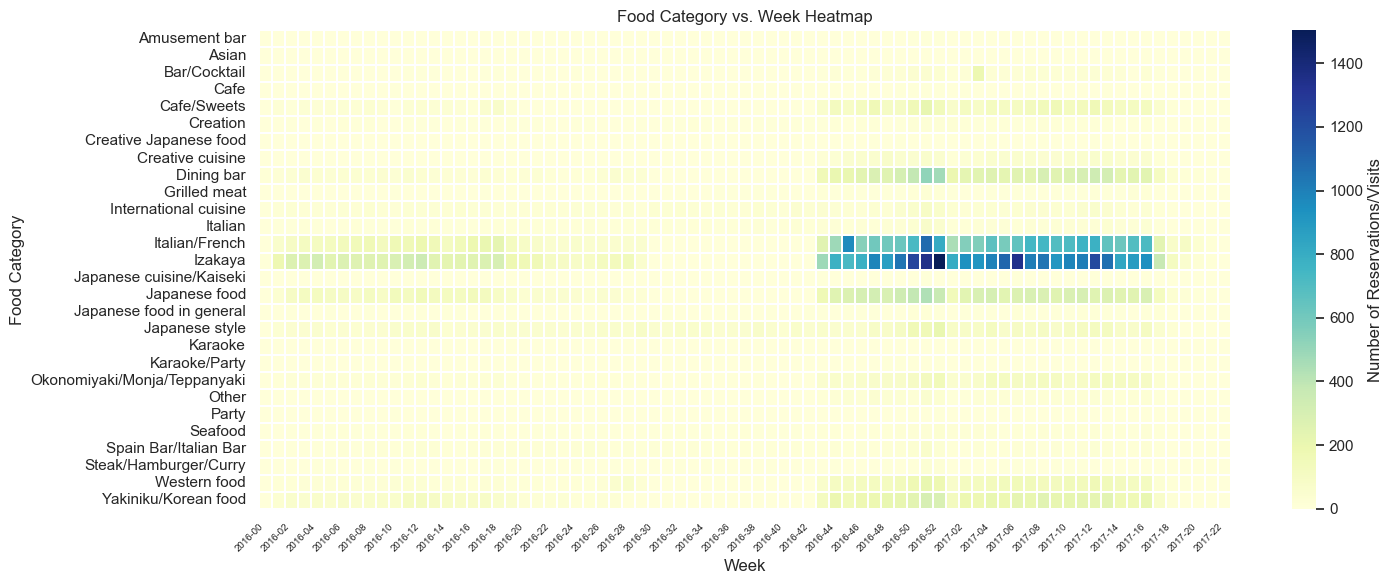

In [892]:
# Plot 28: Food Category vs. Week Heatmap
both["visit_date"] = pd.to_datetime(both["visit_date"])

# Create a "year-week" column (ISO week number)
both["year_week"] = both["visit_date"].dt.strftime("%Y-%U")

# Count visits per week × genre
grouped = (
    both.groupby(["year_week", "genre"])
    .size()
    .reset_index(name="count")
)

# Pivot for heatmap
heatmap_data = grouped.pivot(index="genre", columns="year_week", values="count").fillna(0)

# --- Plot ---
plt.figure(figsize=(15, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    cbar_kws={"label": "Number of Reservations/Visits"},
    linewidths=0.1
)
plt.title("Food Category vs. Week Heatmap")
plt.xlabel("Week")
plt.ylabel("Food Category")
plt.xticks(rotation=45, ha="right", fontsize=7)
plt.tight_layout()
plt.savefig("../reports/figures/feature_relations/food_category_vs_week_heatmap.png")
plt.show()

## HGP visit + Air visit vs. Holidays

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_94975/1450576934.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="holiday_flg", y="visitors", palette="Set2")


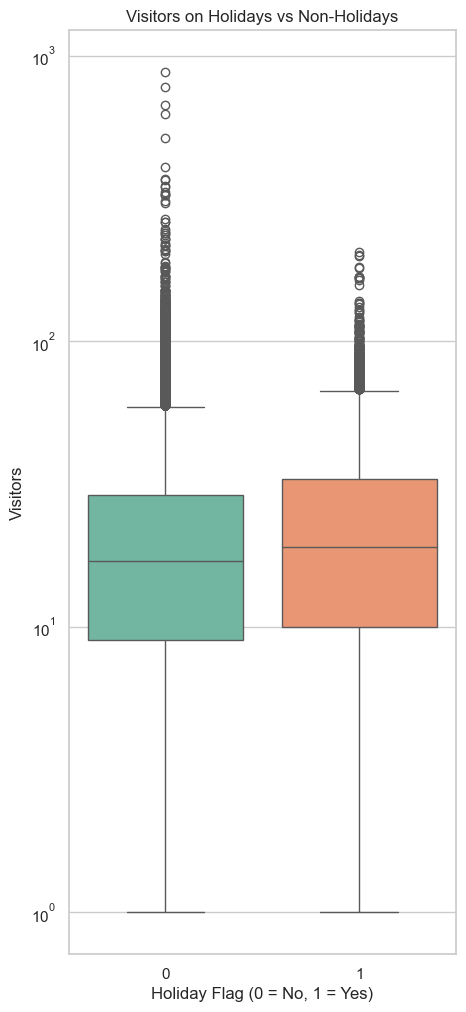

In [893]:
# Plot 29: Visitors on Holidays vs Non-Holidays
air_visit_data["visit_date"] = pd.to_datetime(air_visit_data["visit_date"])
date_info["calendar_date"] = pd.to_datetime(date_info["calendar_date"])

# --- Merge on date (To avoid using SQLite again) --- 
df = air_visit_data.merge(
    date_info[["calendar_date", "holiday_flg"]],
    left_on="visit_date",
    right_on="calendar_date",
    how="left"
)

# --- Plot visitors vs holiday flag ---
plt.figure(figsize=(5,12))
sns.boxplot(data=df, x="holiday_flg", y="visitors", palette="Set2")
plt.yscale("log")
plt.title("Visitors on Holidays vs Non-Holidays")
plt.xlabel("Holiday Flag (0 = No, 1 = Yes)")
plt.ylabel("Visitors")
plt.savefig("../reports/figures/feature_relations/visitors_vs_holiday_flag.png")
plt.show()

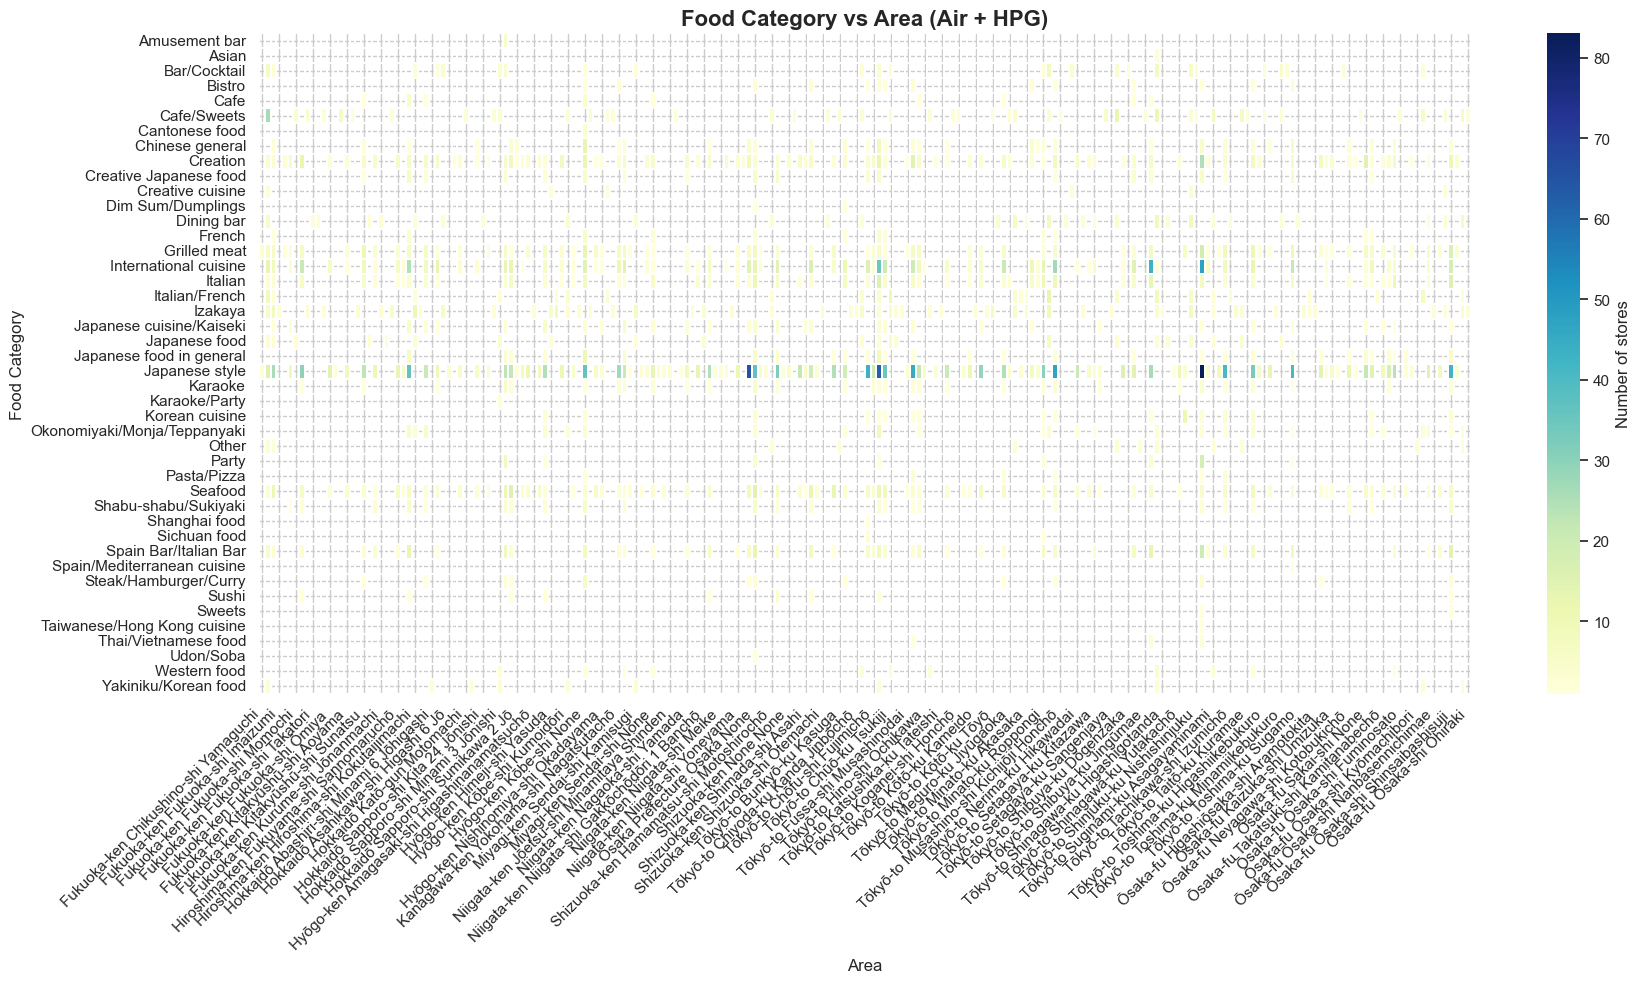

In [894]:
# Plot 30: Area vs types of cuisine from both HPG and Air
# --- Normalize both sources to the same schema ---
air = (
    air_store_info[["air_store_id", "air_genre_name", "air_area_name"]]
    .rename(columns={"air_genre_name":"genre", "air_area_name":"area"})
    .assign(source="air")
)

hpg = (
    hpg_store_info[["hpg_store_id", "hpg_genre_name", "hpg_area_name"]]
    .rename(columns={"hpg_genre_name":"genre", "hpg_area_name":"area"})
    .assign(source="hpg")
)

# combining both tables
both = pd.concat([air[["area","genre","source"]], hpg[["area","genre","source"]]], ignore_index=True)

# aggregating counts
grouped = (
    both.groupby(["genre", "area"])
        .size()   # counts the number in each group
        .reset_index(name="count")
)

# --- Pivot for heatmap ---
heatmap_data = (
    grouped.pivot(index="genre", columns="area", values="count")
)

# --- Plot ---
plt.figure(figsize=(18, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    cbar_kws={"label": "Number of stores"},
    linewidths=0.2,
    linecolor="white"
)
plt.title("Food Category vs Area (Air + HPG)", fontsize=16, weight="bold")
plt.xlabel("Area")
plt.ylabel("Food Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../reports/figures/feature_relations/food_category_vs_area_heatmap.png")
plt.show()